In [155]:
import pickle
data = pickle.load(open('data/karate_cleaned.p','rb'))
# data

# Spectral clustering via the Cheeger vector

In [156]:
import numpy as np
from scipy.sparse import csgraph

In [157]:
matrix = data['matrix']
for a in matrix:
    print a

[0 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0 0]
[1 0 1 1 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0]
[1 1 0 1 0 0 0 1 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0]
[1 1 1 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1]
[0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1]
[1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1]
[0 0 0 0 0 0 0 0 0 0

### Normalized Graph Laplacian

In [158]:
ngl = csgraph.laplacian(matrix.astype(float), normed=True)
ngl

array([[ 1.        , -0.08333333, -0.07905694, ..., -0.10206207,
        -0.        , -0.        ],
       [-0.08333333,  1.        , -0.10540926, ..., -0.        ,
        -0.        , -0.        ],
       [-0.07905694, -0.10540926,  1.        , ..., -0.        ,
        -0.09128709, -0.        ],
       ..., 
       [-0.10206207, -0.        , -0.        , ...,  1.        ,
        -0.11785113, -0.09901475],
       [-0.        , -0.        , -0.09128709, ..., -0.11785113,
         1.        , -0.070014  ],
       [-0.        , -0.        , -0.        , ..., -0.09901475,
        -0.070014  ,  1.        ]])

In [159]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

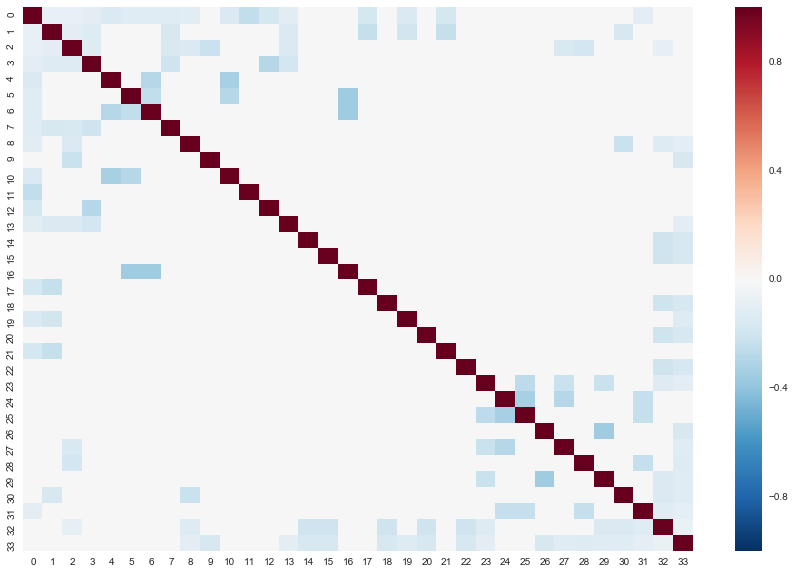

In [160]:
plt.figure(figsize=(15,10))
sns.heatmap(ngl)

### Eigenvectors and Eigenvalues

In [161]:
from scipy.linalg import eig

In [162]:
(eigenvalues, eigenvectors) = eig(ngl, right=False, left=True)
print eigenvectors.shape
print eigenvalues
eigenvectors

(34, 34)
[ -2.49800181e-16+0.j   1.32272329e-01+0.j   2.87048985e-01+0.j
   3.87313233e-01+0.j   1.71461135e+00+0.j   6.12230540e-01+0.j
   6.48992947e-01+0.j   7.07208202e-01+0.j   7.39957989e-01+0.j
   7.70910617e-01+0.j   8.22942852e-01+0.j   8.64832945e-01+0.j
   9.06816002e-01+0.j   1.10538084e+00+0.j   1.15929996e+00+0.j
   1.26802355e+00+0.j   1.61190959e+00+0.j   1.56950660e+00+0.j
   1.35177826e+00+0.j   1.39310454e+00+0.j   1.41691585e+00+0.j
   1.44857938e+00+0.j   1.49703011e+00+0.j   1.58333333e+00+0.j
   1.00000000e+00+0.j   1.00000000e+00+0.j   1.00000000e+00+0.j
   1.00000000e+00+0.j   1.00000000e+00+0.j   1.00000000e+00+0.j
   1.00000000e+00+0.j   1.00000000e+00+0.j   1.00000000e+00+0.j
   1.00000000e+00+0.j]


array([[ -3.20256308e-01,  -2.96399797e-01,   1.44586983e-01, ...,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00],
       [ -2.40192231e-01,  -1.13413889e-01,   3.50466912e-01, ...,
          1.02381971e-16,   1.06364095e-17,   1.59074765e-16],
       [ -2.53184842e-01,   8.97112612e-03,   2.11481660e-01, ...,
         -2.19799805e-17,  -1.03550800e-16,   4.96462301e-16],
       ..., 
       [ -1.96116135e-01,   1.28108134e-01,  -1.10871456e-01, ...,
          1.24049165e-16,  -1.59003548e-16,   4.68327043e-17],
       [ -2.77350098e-01,   2.51627460e-01,  -1.12649647e-01, ...,
         -4.80002082e-16,  -4.22277765e-16,   8.22532117e-16],
       [ -3.30112646e-01,   2.69793542e-01,  -9.23627895e-02, ...,
          5.37478772e-16,   2.97317487e-16,  -7.58639980e-16]])

Eigenvalues
[ -2.49800181e-16+0.j   1.32272329e-01+0.j   2.87048985e-01+0.j
   3.87313233e-01+0.j   1.71461135e+00+0.j   6.12230540e-01+0.j
   6.48992947e-01+0.j   7.07208202e-01+0.j   7.39957989e-01+0.j
   7.70910617e-01+0.j   8.22942852e-01+0.j   8.64832945e-01+0.j
   9.06816002e-01+0.j   1.10538084e+00+0.j   1.15929996e+00+0.j
   1.26802355e+00+0.j   1.61190959e+00+0.j   1.56950660e+00+0.j
   1.35177826e+00+0.j   1.39310454e+00+0.j   1.41691585e+00+0.j
   1.44857938e+00+0.j   1.49703011e+00+0.j   1.58333333e+00+0.j
   1.00000000e+00+0.j   1.00000000e+00+0.j   1.00000000e+00+0.j
   1.00000000e+00+0.j   1.00000000e+00+0.j   1.00000000e+00+0.j
   1.00000000e+00+0.j   1.00000000e+00+0.j   1.00000000e+00+0.j
   1.00000000e+00+0.j]

Eigenvectors
[[ -3.20256308e-01  -2.96399797e-01   1.44586983e-01 ...,   0.00000000e+00
    0.00000000e+00   0.00000000e+00]
 [ -2.40192231e-01  -1.13413889e-01   3.50466912e-01 ...,   1.02381971e-16
    1.06364095e-17   1.59074765e-16]
 [ -2.53184842e-01   8.

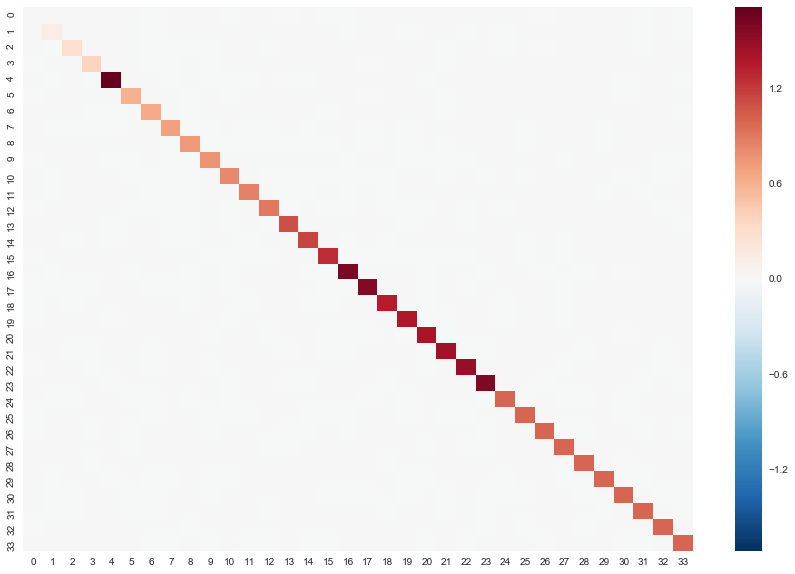

In [163]:
print 'Eigenvalues\n', eigenvalues
print '\nEigenvectors\n', eigenvectors
from numpy.linalg import inv
(eigenvalues, eigenvectors) = eig(ngl, left=True,right=False)
a = np.dot(np.dot(inv(eigenvectors),ngl),eigenvectors)
plt.figure(figsize=(15,10))
print '\nInvert in this base (sanity check)\n'
sns.heatmap(a)

### Sorting the eigenvectors by norm (but that's useless)

In [164]:
# Sort by norm
indexlist = np.argsort(np.linalg.norm(eigenvectors,axis=1))

# Just for test purposes
# indexlist = np.arange(34)
# indexlist=reversed(indexlist)
print indexlist
sorted_eigenvectors = np.array([eigenvectors[:,k] for k in indexlist]).T

[20 22  9 18 19  7 28 15 27 25 12 11  3  8  2 30 16  0 33 29  1 31 32 26 24
 10  4  6  5 23 14 21 17 13]


In [165]:
# a = np.dot(np.dot(inv(sorted_eigenvectors),ngl),sorted_eigenvectors)
# plt.figure(figsize=(15,10))
# sns.heatmap(a)

### Sort by eigenvalues

In [166]:
(eigenvalues, eigenvectors) = eig(ngl, left=True,right=False)
print eigenvalues.shape
eigenvalues

(34,)


array([ -2.49800181e-16+0.j,   1.32272329e-01+0.j,   2.87048985e-01+0.j,
         3.87313233e-01+0.j,   1.71461135e+00+0.j,   6.12230540e-01+0.j,
         6.48992947e-01+0.j,   7.07208202e-01+0.j,   7.39957989e-01+0.j,
         7.70910617e-01+0.j,   8.22942852e-01+0.j,   8.64832945e-01+0.j,
         9.06816002e-01+0.j,   1.10538084e+00+0.j,   1.15929996e+00+0.j,
         1.26802355e+00+0.j,   1.61190959e+00+0.j,   1.56950660e+00+0.j,
         1.35177826e+00+0.j,   1.39310454e+00+0.j,   1.41691585e+00+0.j,
         1.44857938e+00+0.j,   1.49703011e+00+0.j,   1.58333333e+00+0.j,
         1.00000000e+00+0.j,   1.00000000e+00+0.j,   1.00000000e+00+0.j,
         1.00000000e+00+0.j,   1.00000000e+00+0.j,   1.00000000e+00+0.j,
         1.00000000e+00+0.j,   1.00000000e+00+0.j,   1.00000000e+00+0.j,
         1.00000000e+00+0.j])

In [167]:
print np.argsort(eigenvalues)
[eigenvalues[k] for k in np.argsort(eigenvalues)]

[ 0  1  2  3  5  6  7  8  9 10 11 12 24 30 32 31 27 26 33 25 29 28 13 14 15
 18 19 20 21 22 17 23 16  4]


[(-2.4980018054066022e-16+0j),
 (0.13227232922951659+0j),
 (0.28704898538503493+0j),
 (0.38731323261013068+0j),
 (0.61223054020030909+0j),
 (0.64899294666920038+0j),
 (0.70720820249415162+0j),
 (0.73995798930084333+0j),
 (0.77091061685113016+0j),
 (0.82294285233819053+0j),
 (0.86483294458061954+0j),
 (0.90681600158647535+0j),
 (0.999999999999998+0j),
 (0.99999999999999822+0j),
 (0.99999999999999933+0j),
 (0.99999999999999978+0j),
 (0.99999999999999989+0j),
 (0.99999999999999989+0j),
 (0.99999999999999989+0j),
 (1+0j),
 (1.0000000000000004+0j),
 (1.0000000000000007+0j),
 (1.1053808390082949+0j),
 (1.1592999555430796+0j),
 (1.2680235467032606+0j),
 (1.3517782590320488+0j),
 (1.39310454092137+0j),
 (1.4169158506381598+0j),
 (1.4485793824675033+0j),
 (1.4970301128853551+0j),
 (1.5695066032433369+0j),
 (1.5833333333333335+0j),
 (1.6119095875050404+0j),
 (1.7146113474736213+0j)]

so the second smallest eigenvalues is the second in the list eigenvalues (0.132272329229)

In [168]:
second_smallest_eigenvalues = eigenvalues[1]
print second_smallest_eigenvalues
associated_eigenvectors = eigenvectors[1]
v = associated_eigenvectors

(0.13227232923+0j)


v is our **Fiedler Vector**

In [169]:
print v

[ -2.40192231e-01  -1.13413889e-01   3.50466912e-01  -1.16184615e-02
   1.85412174e-01  -7.50281776e-02   1.99279371e-01   3.94584488e-01
   2.43385546e-02  -8.35547698e-03   1.35031338e-01  -2.46323770e-01
   1.54255996e-02   8.61938510e-02   2.56564576e-01  -1.42675190e-01
   3.02953464e-02  -3.37539716e-01  -1.25186576e-01   4.18827810e-02
  -2.64555784e-01  -4.40332947e-01   3.85656048e-02   1.09967053e-16
  -5.87255503e-17   7.96604142e-17   1.63955137e-16  -5.50149584e-17
   1.03140908e-17  -3.83971326e-18   3.31790370e-17   1.02381971e-16
   1.06364095e-17   1.59074765e-16]


According to the sign, it give us the grouping:

In [170]:
# Every negative and corresponding indexes
REDS = filter(lambda a: a!='', [index+1 if v[index] <= 0 else '' for index,a in enumerate(v)])
print REDS
print data['red_list']

[1, 2, 4, 6, 10, 12, 16, 18, 19, 21, 22, 25, 28, 30]
[1, 2, 3, 4, 5, 6, 7, 8, 9, 11, 12, 13, 14, 17, 18, 20, 22]


In [171]:
correct = filter(lambda a:a in REDS,data['red_list'])
print 'Correct',correct ,len(correct)
wrong = filter(lambda a:a not in REDS,data['red_list'])
print 'Wrong',wrong ,len(wrong)

Correct [1, 2, 4, 6, 12, 18, 22] 7
Wrong [3, 5, 7, 8, 9, 11, 13, 14, 17, 20] 10


In [172]:
# Every positive
BLUES = filter(lambda a: a!='', [index+1 if v[index] > 0 else '' for index,a in enumerate(v)])
print BLUES
print data['blue_list']

[3, 5, 7, 8, 9, 11, 13, 14, 15, 17, 20, 23, 24, 26, 27, 29, 31, 32, 33, 34]
[10, 15, 16, 19, 21, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34]


In [173]:
correct = filter(lambda a:a in BLUES,data['blue_list'])
print 'Correct',correct,len(correct)
wrong = filter(lambda a:a not in BLUES,data['blue_list'])
print 'Wrong',wrong ,len(wrong)

Correct [15, 23, 24, 26, 27, 29, 31, 32, 33, 34] 10
Wrong [10, 16, 19, 21, 25, 28, 30] 7


In [174]:
# Ground truth
# print data['red_list']
# print data['blue_list']

![alt src](project2_images/cluster.png)

In [175]:
for a in data['graph']['nodes']:
    a['group'] = 'red' if a['id'] in REDS else 'blue'

import json
with open('cluster_karate_B.json', 'w') as outfile:
    json.dump(data['graph'], outfile)

![alt src](project2_images/cluster_comparison_A.png)

...not that efficient   
**there might be something wrong with my code**

In [ ]:
import numpy as np
import networkx as nx
from sklearn.cluster import SpectralClustering
from sklearn import metrics
np.random.seed(1)

# Get your mentioned graph
G = nx.karate_club_graph()

# Get ground-truth: club-labels -> transform to 0/1 np-array
#     (possible overcomplicated networkx usage here)
gt_dict = nx.get_node_attributes(G, 'club')
gt = [gt_dict[i] for i in G.nodes()]
gt = np.array([0 if i == 'Mr. Hi' else 1 for i in gt])

# Get adjacency-matrix as numpy-array
adj_mat = nx.to_numpy_matrix(G)

print('ground truth')
print(gt)

# Cluster
sc = SpectralClustering(2, affinity='precomputed', n_init=100)
sc.fit(adj_mat)

# Compare ground-truth and clustering-results
print('spectral clustering')
print(sc.labels_)
print('just for better-visualization: invert clusters (permutation)')
print(np.abs(sc.labels_ - 1))

# Calculate some clustering metrics
print(metrics.adjusted_rand_score(gt, sc.labels_))
print(metrics.adjusted_mutual_info_score(gt, sc.labels_))

# Transition path analysis

### 1. Markov Chain

Define a Markov chain according to the network structure, such that from each node a random
walker will jump to its neighbors with equal probability,   
i.e. $P = D^{−1}A$ where $D = diag(d_{i})$  
and $d_{i} = \sum _j A_{ij}$ 

In [ ]:
D = np.diag(np.sum(matrix,axis=1))
print D
# plt.figure(figsize=(15,10))
# sns.heatmap(D)

In [ ]:
#Inverse of D
inv_D = np.diag(1./np.sum(matrix,axis=1))
inv_D
plt.figure(figsize=(15,10))
sns.heatmap(inv_D)

In [ ]:
#P-1 * A
markov = np.dot(inv_D,matrix.T.astype(int))
print markov
plt.figure(figsize=(15,10))
sns.heatmap(markov)
np.sum(markov,axis=1)

### 2. Stationnary Distribution

In [ ]:
from scipy.linalg import eig

S, U = eig(markov, right=False, left=True)
# print S
# print U

In [ ]:
# Eigenvector corresponding to the eigenvalue 1
print np.abs(S - 1.)
np.argsort(np.abs(S - 1.))
# Position 0!

In [ ]:
stationary = np.array(U[0])
stationary /= np.sum(stationary)
print stationary
print D

plt.figure(figsize=(15,1))
sns.heatmap([np.abs(stationary),np.abs(stationary)])

plt.figure(figsize=(15,1))
sns.heatmap([np.sum(matrix,axis=0),np.sum(matrix,axis=1)])

In [ ]:
# Matlab

% Transition Path Analysis for Karate Club network
%
%   Reference:
%       Weinan E, Jianfeng Lu, and Yuan Yao (2013) 
%       The Landscape of Complex Networks: Critical Nodes and A Hierarchical Decomposition. 
%       Methods and Applications of Analysis, special issue in honor of Professor Stanley Osher on his 70th birthday, 20(4):383-404, 2013.

% load the Adjacency matrix of Karate Club network
%   replace it by your own data
load karate_rand1.mat A

D = sum(A, 2);
N = length(D);
Label = [0:N-1];
TransProb = diag(1./D) * A;
LMat = TransProb - diag(ones(N, 1));

% source set A contains the coach
% target set B contains the president 
SetA = 1; % [44:54];%[find(ind==19)];%[44:54];%18 + 1;
SetB = 34; %[find(ind==11)];%10 + 1; % seems to be 11 instead of 10

[EigV, EigD] = eig(LMat');
EquiMeasure = EigV(:, 1)./sign(EigV(1,1));

for i = 1:N
  localmin = true;
  for j = setdiff(1:N, i)
    if ((LMat(i,j)>0)&(EquiMeasure(j)>EquiMeasure(i))) 
      localmin = false;
      break
    end
  end
  if (localmin)
    i
  end
end

mfpt = zeros(N, 1);
SourceSet = 11;
RemainSet = setdiff(1:N, SourceSet);
mfpt(RemainSet) = - LMat(RemainSet, RemainSet) \ ones(N-1, 1);

TransLMat = diag(EquiMeasure) * LMat * diag(1./EquiMeasure); 

SourceSet = SetA;
TargetSet = SetB;
RemainSet = setdiff(1:N, union(SourceSet, TargetSet));

% Initialization of Committor function: transition probability of reaching
% the target set before returning to the source set.
CommitAB = zeros(N, 1);
CommitAB(SourceSet) = zeros(size(SourceSet));
CommitAB(TargetSet) = ones(size(TargetSet));

LMatRestrict = LMat(RemainSet, RemainSet);
RightHandSide = - LMat(RemainSet, TargetSet) * CommitAB(TargetSet);

% Solve the Dirchelet Boundary problem
CommitAB(RemainSet) = LMatRestrict \ RightHandSide;

% Clustering into two basins according to the transition probability 
ClusterA = find(CommitAB <= 0.5);
ClusterB = find(CommitAB > 0.5);

% The inverse transition probability (committor function)
CommitBA = zeros(N, 1);
CommitBA(SourceSet) = ones(size(SourceSet));
CommitBA(TargetSet) = zeros(size(TargetSet));

LMatRestrict = LMat(RemainSet, RemainSet);
RightHandSide = - LMat(RemainSet, SourceSet) * CommitBA(SourceSet);

% Dirichelet Boundary Problem with inverse transition probability
CommitBA(RemainSet) = LMatRestrict \ RightHandSide;

RhoAB = EquiMeasure .* CommitAB .* CommitBA;

% Current or Flux on edges
CurrentAB = diag(EquiMeasure .* CommitBA) * LMat * diag(CommitAB);
CurrentAB = CurrentAB - diag(diag(CurrentAB));

% Effective Current Flux
EffCurrentAB = max(CurrentAB - CurrentAB', 0);

% Transition Current or Flux on each node
TransCurrent = zeros(N, 1);
TransCurrent(ClusterA) = sum(EffCurrentAB(ClusterA, ClusterB), 2);
TransCurrent(ClusterB) = sum(EffCurrentAB(ClusterA, ClusterB), 1);